Tamaño del conjunto de entrenamiento: (14599, 23)
Tamaño del conjunto de prueba: (3650, 23)
Regresión Lineal:
MSE: 0.0874
R²: 0.4558

Random Forest:
MSE: 0.0190
R²: 0.8818

Importancia de características:
         feature  importance
10  type_organic    0.383246
7     Large Bags    0.093171
2           4046    0.092925
3           4225    0.081167
0     Unnamed: 0    0.070384
9           year    0.060256
11         month    0.047257
6     Small Bags    0.041646
4           4770    0.039638
5     Total Bags    0.037707

Red Neuronal:
MSE: 0.0553
R²: 0.6559
             Modelo       MSE        R²
1     Random Forest  0.018996  0.881770
2      Red Neuronal  0.055292  0.655866
0  Regresión Lineal  0.087442  0.455760


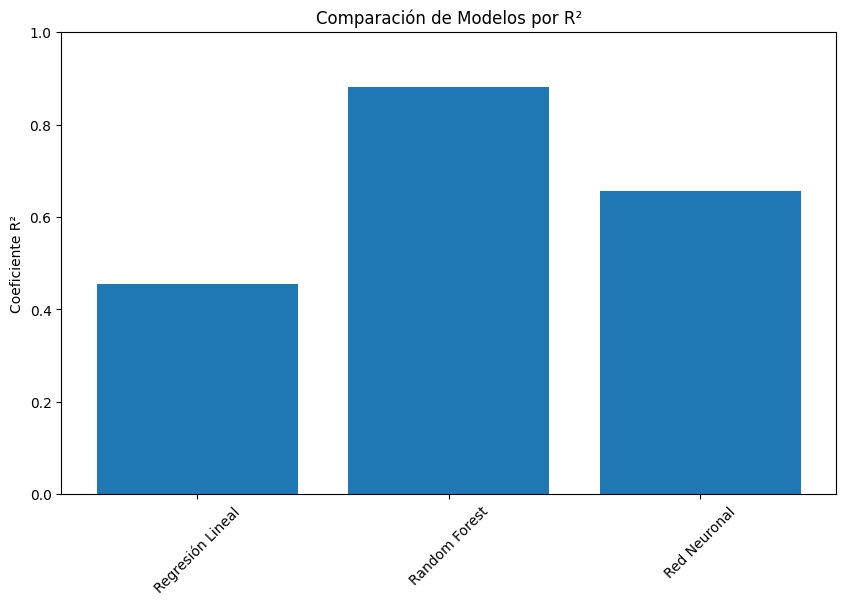

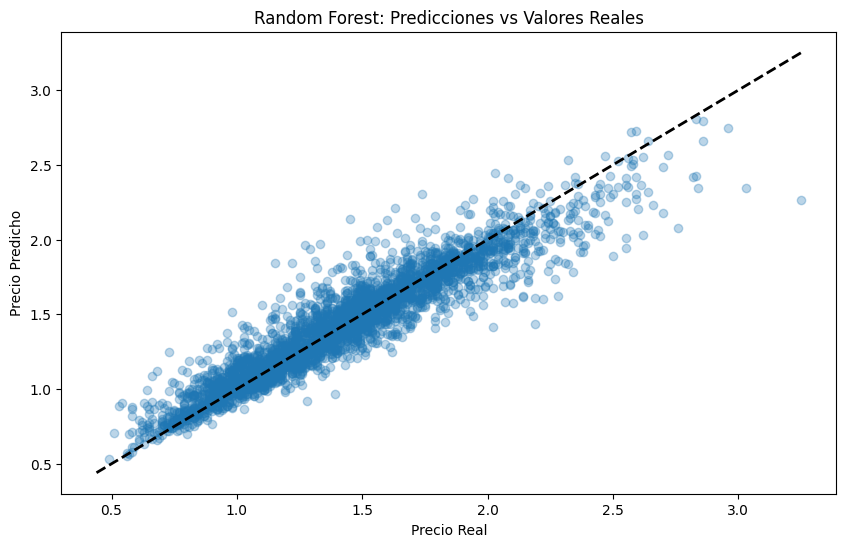

In [1]:
# %% [markdown]
# # Modelos Predictivos - Precios de Aguacate

# %%
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos limpios
avocado = pd.read_csv('../data/avocado_clean.csv')

# %% [markdown]
# ## 1. Preparación de datos
# %%
# Separar características y objetivo
X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# %% [markdown]
# ## 2. Modelo 1: Regresión Lineal
# %%
# Crear y entrenar modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluar
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# %% [markdown]
# ## 3. Modelo 2: Random Forest
# %%
# Crear y entrenar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Importancia de características
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características:")
print(feature_importances.head(10))

# %% [markdown]
# ## 4. Modelo 3: Red Neuronal
# %%
# Escalar datos para la red neuronal
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar modelo
nn = MLPRegressor(hidden_layer_sizes=(50, 50), 
                  max_iter=500, 
                  random_state=42)
nn.fit(X_train_scaled, y_train)

# Evaluar
y_pred_nn = nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("\nRed Neuronal:")
print(f"MSE: {mse_nn:.4f}")
print(f"R²: {r2_nn:.4f}")

# %% [markdown]
# ## 5. Comparación de Modelos
# %%
# Crear tabla comparativa
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'MSE': [mse_lr, mse_rf, mse_nn],
    'R²': [r2_lr, r2_rf, r2_nn]
})

print(results.sort_values('R²', ascending=False))

# Visualización comparativa
plt.figure(figsize=(10, 6))
plt.bar(results['Modelo'], results['R²'])
plt.title('Comparación de Modelos por R²')
plt.ylabel('Coeficiente R²')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# %% [markdown]
# ## 6. Visualización de Predicciones
# %%
# Gráfico de predicciones vs valores reales (usando Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.show()